In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import time
TRAINING_DIR = "C:\\Users\\Khan\\FireDetection\\FIRE-SMOKE-DATASET\\Train"

training_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,horizontal_flip=True,fill_mode='nearest')

VALIDATION_DIR = "C:\\Users\\Khan\\FireDetection\\FIRE-SMOKE-DATASET\\Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 5018 images belonging to 2 classes.
Found 872 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()


history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    workers=1,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
    
)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [6]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 14 steps, validate for 14 steps
Epoch 1/10
14/14 [==============================] - 171s 12s/step - loss: 0.0780 - acc: 0.9721 - val_loss: 0.2230 - val_acc: 0.9643
Epoch 2/10
14/14 [==============================] - 167s 12s/step - loss: 0.0740 - acc: 0.9721 - val_loss: 0.2114 - val_acc: 0.9643
Epoch 3/10
14/14 [==============================] - 170s 12s/step - loss: 0.0758 - acc: 0.9693 - val_loss: 0.2016 - val_acc: 0.9643
Epoch 4/10
14/14 [==============================] - 170s 12s/step - loss: 0.0655 - acc: 0.9777 - val_loss: 0.1952 - val_acc: 0.9643
Epoch 5/10
14/14 [==============================] - 159s 11s/step - loss: 0.0944 - acc: 0.9698 - val_loss: 0.1902 - val_acc: 0.9643
Epoch 6/10
14/14 [==============================] - 167s 12s/step - loss: 0.0731 - acc: 0.9693 - val_loss: 0.1905 - val_acc: 0.9643
Epoch 7/10
14/14 [==============================] - 158s 11s/step - loss: 0.0577 - acc: 0.9775 - val_loss: 0.1861 - 

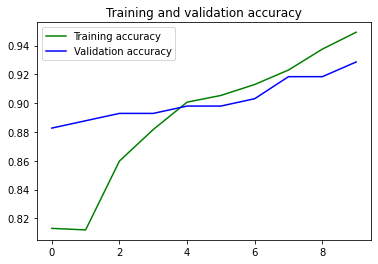

<Figure size 432x288 with 0 Axes>

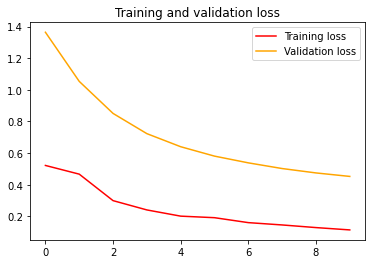

<Figure size 432x288 with 0 Axes>

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: savedInceptionV3\assets


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()






In [7]:
export_dir = "C:\\s\Khan\\FireDetectionv2"
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\s\Khan\FireDetectionv2\assets


In [18]:
#predicting any random image
import numpy as np
#from google.colab import files
from keras.preprocessing import image

uploaded = open()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

TypeError: open() missing required argument 'file' (pos 1)

In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
#Load the saved model
model = tf.keras.models.load_model('savedInceptionV3')
video = cv2.VideoCapture(0)
while True:
        _, frame = video.read()
#Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')
#Resizing into 224x224 because we trained the model with this image size.
        im = im.resize((224,224))
        img_array = image.img_to_array(im)
        img_array = np.expand_dims(img_array, axis=0) / 255
        probabilities = model.predict(img_array)[0]
        #Calling the predict method on model to predict 'fire' on the image
        prediction = np.argmax(probabilities)
        #if prediction is 0, which means there is fire in the frame.
        if prediction == 0:
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            print(probabilities[prediction])
            cv2.imshow("Capturing", frame)
            key=cv2.waitKey(1)
            if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()